In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns


## Data Exploration Summary

### 1. Dataset Overview
- **File Loaded:** `digital_marketing_campaign_dataset.csv`
- **Shape:** 8,000 rows × 20 columns  
- **Data Types:**  
  - **Numeric:** 15 columns (`int64`, `float64`)  
  - **Categorical:** 5 columns (`object`)  

### 2. Data Quality
- **Duplicates:**  
  - 0 duplicate rows found (`False: 8000` in `df.duplicated().value_counts()`).
- **Missing Values:**  
  - No null values found in any column (`df.isna().sum()` = 0 for all).
- **Column Names:**  
  - Revenue was not provided, thus can't calculate **ROAS** 

### 3. Descriptive Statistics (Key Observations)
- **Age:** Ranges from 18 to 69 (mean ≈ 43.6 years).
- **Income:**  
  - Min: 20,014  
  - Max: 149,986  
  - Mean ≈ 84,664  
  - Total = **677,313,574**
- **AdSpend:**  
  - Min: 100.05  
  - Max: 9,997.91  
  - Mean ≈ 5,000.94  
  - Total = **40,007,558.64**
- **Loyalty Points:** Range 0 to 4,999.
- **Campaign Metrics:**  
  - CTR ranges from 0.01 to 0.30.  
  - Conversion Rate ranges from 0.01 to 0.20.  
  - Website Visits range 0–49.  
  - Time on Site ranges 0.50–14.99 minutes.

### 4. Campaign Insights
- **Campaign Channels:** 5 unique values: `Social Media`, `Email`, `PPC`, `Referral`, `SEO`.
- **Campaign Types:** 4 unique types (e.g., Awareness, Conversion, Retention, etc.).
- **Customer Base:** Exactly 8,000 unique customers.


### 6. Insights & Observations
- Dataset is **clean**:  
  - No duplicates, no missing values.
- Wide variation in **AdSpend** and **Income**, indicating potential segmentation opportunities.
- CTR and Conversion Rates vary moderately, suggesting differences in campaign performance by channel.
- Balanced mix of marketing channels; social media, email, and PPC appear frequently.
- Demographics span a wide age range, enabling targeted marketing strategies.



---

## **Next Steps:**

### Customer Segmentation & Behavior
1. **Transaction Patterns:** Analyze customers based on `PreviousPurchases` to identify frequent vs. occasional buyers.  
2. **Points Engagement & Loyalty:** Use `LoyaltyPoints` to categorize high vs. low engagement customers.  
3. **Spending Patterns:** If order amounts are available, segment customers by total spend or average order value.  

### Campaign Metrics Evaluation
4. **CPA Calculation (Cost per Acquisition):** Measure the cost for each conversion across campaign types and channels.  
5. **CPRS Calculation (Cost per Social Share):** Evaluate campaigns’ cost-effectiveness in generating social shares.  

### Customer Engagement Analysis
6. **Website Engagement:** Examine distribution of `WebsiteVisits`, `PagesPerVisit`, and `TimeOnSite`.  
7. **Social Media Engagement:** Analyze shares, clicks, and interaction rates by channel.  
8. **Email Engagement:** Track `EmailOpens` vs. `EmailClicks` to determine click-through behavior and engagement frequency.  
9. **Correlation Analysis:** Assess relationships between engagement metrics, conversions, and loyalty points.  

### Channel Performance Comparison
10. **CTR by CampaignChannel:** Aggregate `ClickThroughRate` to identify the most effective channels.  
11. **ConversionRate by CampaignChannel:** Evaluate which channels convert best.  
12. **AdSpend by CampaignChannel:** Compare spending efficiency across channels to guide budget allocation.  



#### Data Loading

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
file = r"D:\Confiz\Project 4- Marketting Metrics\mall campaign\dataset\digital_marketing_campaign_dataset.csv"
data = pd.read_csv(file)
df = pd.DataFrame(data)

#### Data Exploration

In [4]:
df.head(10)

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
5,8005,25,Female,42925,Social Media,Awareness,9579.388247,0.153795,0.161316,6,2.125850,7.752831,95,5,8,0,3316,IsConfid,ToolConfid,1
6,8006,38,Female,25615,Referral,Awareness,7302.899852,0.040975,0.060977,42,1.753995,10.698672,54,14,3,6,930,IsConfid,ToolConfid,1
7,8007,56,Female,57083,Social Media,Conversion,5324.283667,0.052878,0.188946,48,2.626015,2.987817,96,9,3,0,2983,IsConfid,ToolConfid,1
8,8008,36,Female,140788,Email,Retention,9421.250951,0.023536,0.112585,13,5.472843,14.287421,73,4,8,5,460,IsConfid,ToolConfid,1
9,8009,40,Male,130764,Social Media,Awareness,6229.193333,0.066641,0.169786,22,1.135665,4.613312,14,8,4,8,3789,IsConfid,ToolConfid,1


In [5]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel',
       'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'AdvertisingPlatform', 'AdvertisingTool', 'Conversion'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [7]:
print(df.duplicated().value_counts())
df.describe()

False    8000
Name: count, dtype: int64


,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


In [8]:
df.isna().sum()

CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

#### Few Information

In [9]:
print("Toatal AdSpend:    ", df['AdSpend'].sum())
print("Max AdSpend:    ", df['AdSpend'].max())
print("Min AdSpend:    ", df['AdSpend'].min())

print("Toatal Customer's Income:    ", df['Income'].sum())
print("Total Customers:    ", df['CustomerID'].value_counts().sum())
print("Max Customers Loyalty:    ", df['LoyaltyPoints'].max())
print("Min Customers Age:    ", df['Age'].min())

print("Total Campaign Types:    ", df['CampaignType'].nunique())
print("Total Campaign Channel:    ", df['CampaignChannel'].unique())



Toatal AdSpend:     40007558.64339962
Max AdSpend:     9997.914780944691
Min AdSpend:     100.05481308980612
Toatal Customer's Income:     677313574
Total Customers:     8000
Max Customers Loyalty:     4999
Min Customers Age:     18
Total Campaign Types:     4
Total Campaign Channel:     ['Social Media' 'Email' 'PPC' 'Referral' 'SEO']


In [10]:
data = df.copy()

##### Defining bin

In [11]:
bins = [17, 24, 34, 54, 65, 100]  
labels = ['Young Adult Shopper', 'Adult Shopper', 'Middle-Aged Shopper', 'Senior Shopper', 'Elderly Shopper']

data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)


bins = [0, 50000, 100000, 150000]
labels = ['Low Income Group', 'Middle Income Group', 'High Income Group']

data['IncomeGroup'] = pd.cut(data['Income'], bins=bins, labels=labels)

In [12]:
data.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion,AgeGroup,IncomeGroup
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1,Senior Shopper,High Income Group
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1,Elderly Shopper,Low Income Group
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1,Middle-Aged Shopper,Middle Income Group
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1,Adult Shopper,Low Income Group
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1,Senior Shopper,Middle Income Group


## Customer Segmentation Analysis

### Transaction Patterns (by `PreviousPurchases`)
- Customers were segmented into four categories based on their previous purchase counts:
  - **No Purchases:** 0 purchases → 838 customers  
  - **Occasional (1–2):** 1–2 purchases → 1,567 customers  
  - **Regular (3–5):** 3–5 purchases → 2,398 customers  
  - **Elite (6+):** 6 or more purchases → 3,197 customers  

- **Observation:** Majority of customers fall into the **Elite** and **Regular** segments, indicating a strong base of repeat buyers.  

- **Visualization:** Bar chart shows the distribution of customers across transaction segments.

---

### Points Engagement & Loyalty (by `LoyaltyPoints`)
- Loyalty tiers were defined as:
  - **No Points:** 0 points → 4 customers  
  - **Low (1–499):** 762 customers  
  - **Medium (500–1999):** 2,440 customers  
  - **High (2000–4999):** 4,794 customers  

- **Observation:** Most customers are in the **High** tier, suggesting strong engagement with loyalty programs.  

- **Visualization:** Bar chart shows the number of customers in each loyalty tier.

---

### Spending Patterns (by `AgeGroup` & `IncomeGroup`)
- **Age Distribution:** Customers grouped into Bins:
- **Income Distribution:** Customers grouped into Bins:
- **Gender Composition by AgeGroup:**
  - Females slightly outnumber males in most age groups.  
  - Pivot table and stacked bar chart show gender distribution per age quantile.  

- **Observation:** Age and income segmentation can help tailor campaign strategies; e.g., targeting high-income segments in specific age groups.

---

### Data Export
- The segmented dataset was saved as `customer_segments.csv` with the following columns:
  - `CustomerID`  
  - `PurchaseFrequency`  
  - `LoyaltyTier`  
  - `AgeGroup`  
  - `IncomeGroup`  

- This dataset can be used for targeted marketing, campaign analysis, and personalization.

---

**Visualizations Generated:**
1. Customer Transaction Segments (bar chart)  
2. Loyalty Points Engagement Tiers (bar chart)  
3. Age Group Distribution (bar chart)  
4. Income Group Distribution (bar chart)  
5. Gender Composition by Age Group (stacked bar chart)


#### 1) Transaction Patterns (by PreviousPurchases)

In [13]:
print("Minimum purchases:", data['PreviousPurchases'].min())
print("Maximum purchases:", data['PreviousPurchases'].max())
print("Mean purchases:", data['PreviousPurchases'].mean())

Minimum purchases: 0
Maximum purchases: 9
Mean purchases: 4.4855


SpendingPatternLabel
No Purchase                838
Budget Customer            794
Moderate Spender           773
Growing Value Customer    1619
High-Value Customer       1597
Premium Customer          1560
Elite Premium Customer     819
Name: count, dtype: int64

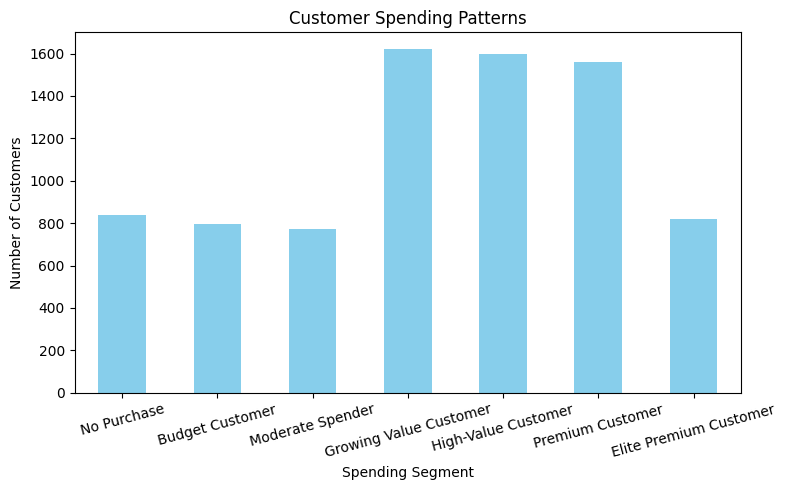

In [14]:
# Spending pattern distribution based on previous purchases
def spending_pattern(n):
    if n <= 0: 
        return 'Very Low_total_spend'      
    if n == 1: 
        return 'Low_total_spend'              
    if n == 2: 
        return 'Medium-Low_total_spend'      
    if n <= 4: 
        return 'Medium-High_total_spend'     
    if n <= 6: 
        return 'High_total_spend'            
    if n <= 8: 
        return 'Very High_total_spend'        
    return 'Exceptional_total_spend'        

data['SpendingPattern'] = data['PreviousPurchases'].apply(spending_pattern)


spending_labels = {
    'Very Low_total_spend': 'No Purchase',
    'Low_total_spend': 'Budget Customer',
    'Medium-Low_total_spend': 'Moderate Spender',
    'Medium-High_total_spend': 'Growing Value Customer',
    'High_total_spend': 'High-Value Customer',
    'Very High_total_spend': 'Premium Customer',
    'Exceptional_total_spend': 'Elite Premium Customer'
}

data['SpendingPatternLabel'] = data['SpendingPattern'].map(spending_labels)

# Summary
pattern_counts = data['SpendingPatternLabel'].value_counts().reindex(
    ['No Purchase','Budget Customer','Moderate Spender','Growing Value Customer',
     'High-Value Customer','Premium Customer','Elite Premium Customer']
)
display(pattern_counts)

# Visualization
plt.figure(figsize=(8,5))
pattern_counts.plot(kind='bar', color='skyblue')
plt.title('Customer Spending Patterns')
plt.xlabel('Spending Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


#### 2) Points Engagement & Loyalty (LoyaltyPoints)

LoyaltyTier
Bronze       766
Silver      1639
Gold        2433
Platinum    3162
Name: count, dtype: int64

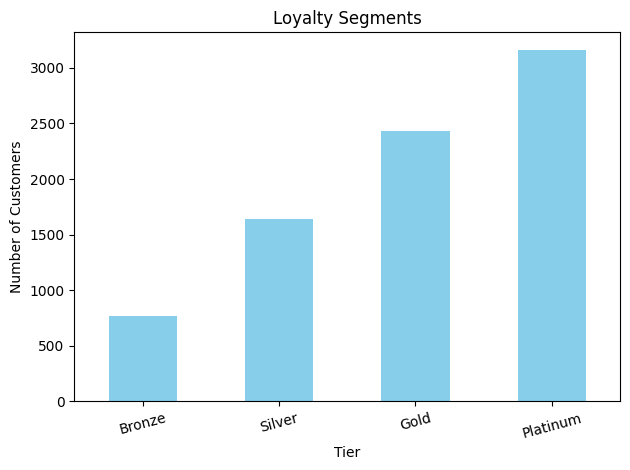

In [ ]:
# distribution fixed thresholds

def loyalty_segment(x):
    if pd.isna(x) or x < 500: 
        return 'Bronze'      
    if x < 1500: 
        return 'Silver'      
    if x <= 3000: 
        return 'Gold'       
    return 'Platinum'        


data['LoyaltyTier'] = data['LoyaltyPoints'].apply(loyalty_segment)

tier_counts = data['LoyaltyTier'].value_counts().reindex(
    ['Bronze', 'Silver', 'Gold', 'Platinum']
)
display(tier_counts)

# Visualization
plt.figure()
tier_counts.plot(kind='bar', color='skyblue')
plt.title('Loyalty Segments')
plt.xlabel('Tier')
plt.ylabel('Number of Customers')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()



#### 3) Spending Patterns (requires order amounts)

AgeGroup
Young Adult Shopper    1031
Adult Shopper          1529
Middle-Aged Shopper    3151
Senior Shopper         1672
Elderly Shopper         617
Name: count, dtype: int64

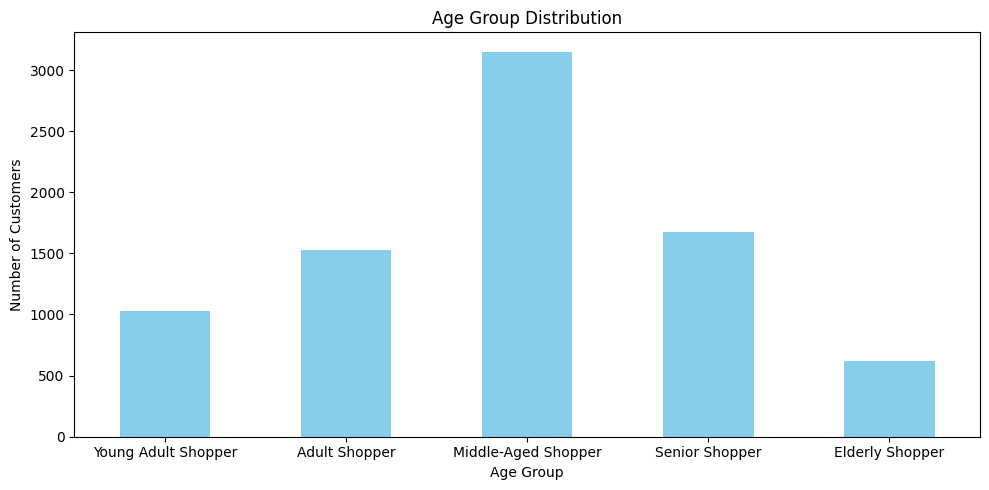

IncomeGroup
Low Income Group       1892
Middle Income Group    2992
High Income Group      3116
Name: count, dtype: int64

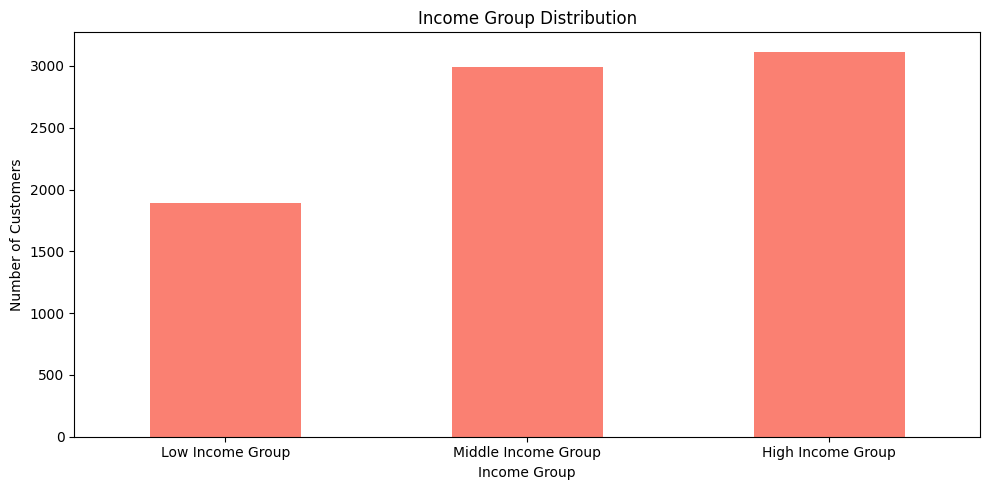

C:\Users\ahmed.muavia\AppData\Local\Temp\ipykernel_16828\3514625909.py:30: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  gender_age = data.pivot_table(


Gender,Female,Male
AgeGroup,,
Young Adult Shopper,616,415
Adult Shopper,906,623
Middle-Aged Shopper,1923,1228
Senior Shopper,1015,657
Elderly Shopper,379,238


<Figure size 1000x500 with 0 Axes>

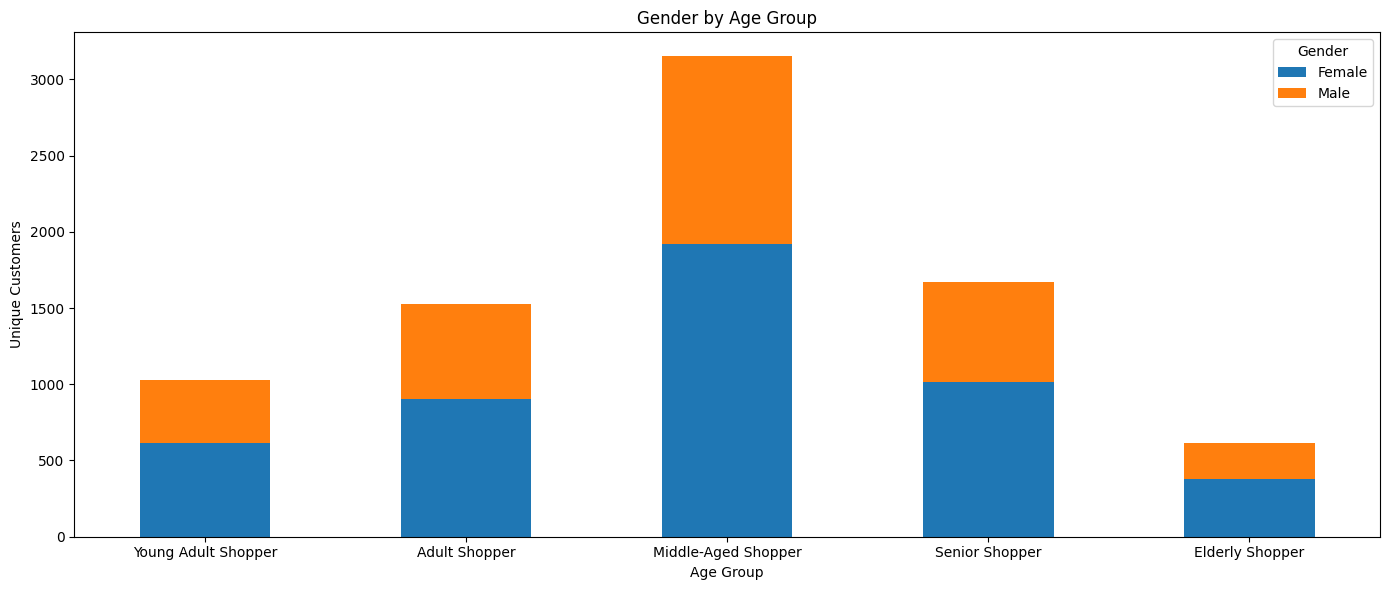

In [16]:
# Age distribution
age_counts = data['AgeGroup'].value_counts().sort_index()
display(age_counts)

plt.figure(figsize=(10, 5))
age_counts.plot(kind='bar', color='skyblue')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Income distribution
inc_counts = data['IncomeGroup'].value_counts().sort_index()
display(inc_counts)

plt.figure(figsize=(10, 5))
inc_counts.plot(kind='bar', color='salmon')
plt.title('Income Group Distribution')
plt.xlabel('Income Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Pivot table (data preparation stays the same)
gender_age = data.pivot_table(
    index='AgeGroup',
    columns='Gender',
    values='CustomerID',
    aggfunc='nunique',
    fill_value=0
)
display(gender_age)

# Plot stacked bar with increased width
plt.figure(figsize=(10, 5))  
gender_age.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title('Gender by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Unique Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [17]:
# new segment columns alongside original keys
segment_cols = ['PurchaseFrequency','LoyaltyTier','AgeGroup','IncomeGroup']
available = [c for c in segment_cols if c in data.columns]
segmented = data[['CustomerID'] + available].drop_duplicates()

# Preview & save
display(segmented.head(10))
segmented.to_csv(r'D:\Confiz\Project 4- Marketting Metrics\mall campaign\extracted_dataset\customer_segments.csv', index=False)
print("Saved 'customer_segments.csv'")


,CustomerID,LoyaltyTier,AgeGroup,IncomeGroup
0,8000,Silver,Senior Shopper,High Income Group
1,8001,Platinum,Elderly Shopper,Low Income Group
2,8002,Gold,Middle-Aged Shopper,Middle Income Group
3,8003,Gold,Adult Shopper,Low Income Group
4,8004,Platinum,Senior Shopper,Middle Income Group
5,8005,Platinum,Adult Shopper,Low Income Group
6,8006,Silver,Middle-Aged Shopper,Low Income Group
7,8007,Gold,Senior Shopper,Middle Income Group
8,8008,Bronze,Middle-Aged Shopper,High Income Group
9,8009,Platinum,Middle-Aged Shopper,High Income Group


Saved 'customer_segments.csv'


## Campaign Metrics Evaluation

### CPA (Cost per Acquisition)
- **Definition:** Cost per acquisition measures how much is spent to achieve one conversion.  
  CPA is AdSpend divided by Conversions

- **Calculation:**  
  - Aggregated `AdSpend` and `Conversion` by `CampaignChannel` and `CampaignType`.  
  - CPA calculated only for campaigns with at least one conversion.  

- **Key Observations:**  
  - PPC Conversion campaigns have the lowest CPA (~5,137 per conversion).  
  - Email and Social Media Conversion campaigns show slightly higher CPAs (~5,500–5,600).  
  - CPA varies across channels and campaign types, indicating different cost-efficiency levels.

- **Visualization:**  
  - Bar chart showing CPA by `CampaignType` highlights which campaigns are most cost-effective.

---

### CPRS (Cost per Social Share)
- **Definition:** Cost per social share evaluates how efficiently campaigns generate social engagement.  
  CPRS is AdSpend divided by SocialShares
  

- **Calculation:**  
  - Aggregated `AdSpend` and `SocialShares` by `CampaignChannel` and `CampaignType`.  
  - CPRS calculated only for campaigns with at least one social share.

- **Key Observations:**  
  - Social Media campaigns (Conversion and Consideration) have the lowest CPRS (~94–97 per share), indicating high cost-efficiency in social engagement.  
  - SEO, Email, and PPC campaigns have higher CPRS (~98–104), meaning higher spend per share.  

- **Visualization:**  
  - Bar chart of CPRS by `CampaignChannel` shows which channels provide the most social shares per unit spend.

---

**Insights:**
- CPA highlights campaigns that are cost-effective in driving conversions.  
- CPRS highlights campaigns that are cost-effective in generating social engagement.  
- Combining CPA and CPRS helps identify campaigns that are efficient both in conversions and engagement.


#### CPA Calculation (Cost per Acquisition)
- Each conversion costs for every campaign type/channel

,CampaignChannel,CampaignType,AdSpend,Conversion,CPA
6,PPC,Conversion,2.157813e+06,420,5137.650019
14,SEO,Conversion,1.980840e+06,378,5240.318690
18,Social Media,Conversion,1.784546e+06,339,5264.148111
10,Referral,Conversion,2.226189e+06,414,5377.267924
2,Email,Conversion,2.150688e+06,388,5543.011284
19,Social Media,Retention,1.827002e+06,319,5727.279731
15,SEO,Retention,1.934028e+06,337,5738.956536
17,Social Media,Consideration,1.976548e+06,344,5745.779182
5,PPC,Consideration,2.021319e+06,351,5758.744016
11,Referral,Retention,2.170368e+06,375,5787.647512


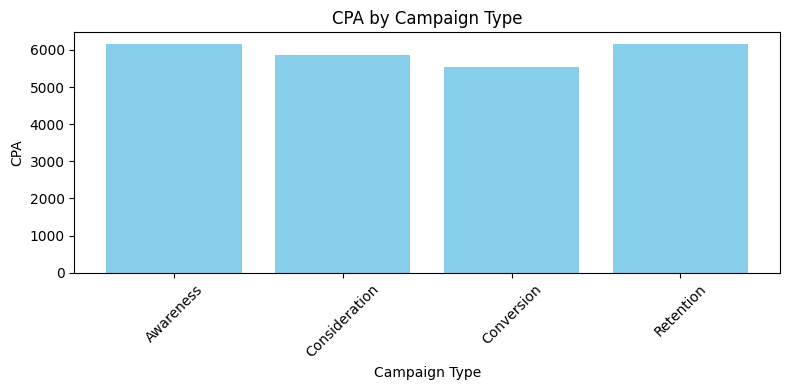

In [18]:
# CPA = AdSpend / Conversions

# CPA for each campaign type/channel
cpa_df = data.groupby(['CampaignChannel', 'CampaignType'], as_index=False).agg({
    'AdSpend': 'sum',
    'Conversion': 'sum'
})

# Calculate CPA
cpa_df['CPA'] = cpa_df.apply(
    lambda r: r['AdSpend'] / r['Conversion'] if r['Conversion'] > 0 else None,
    axis=1
)


display(cpa_df.sort_values(by='CPA'))

# Visualization
plt.figure(figsize=(8, 4))
plt.bar(cpa_df['CampaignType'], cpa_df['CPA'], color='skyblue')
plt.title('CPA by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('CPA')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#### CPRS Calculation (Cost per Social Share)
- Most cost-effective social shares

,CampaignChannel,CampaignType,AdSpend,SocialShares,CPRS
18,Social Media,Conversion,1.784546e+06,18868,94.580571
17,Social Media,Consideration,1.976548e+06,20293,97.400485
9,Referral,Consideration,2.036699e+06,20840,97.730290
0,Email,Awareness,1.845084e+06,18757,98.367751
19,Social Media,Retention,1.827002e+06,18569,98.389910
10,Referral,Conversion,2.226189e+06,22495,98.963722
4,PPC,Awareness,2.056792e+06,20763,99.060438
6,PPC,Conversion,2.157813e+06,21638,99.723311
7,PPC,Retention,1.963313e+06,19632,100.005753
16,Social Media,Awareness,1.954227e+06,19509,100.170525


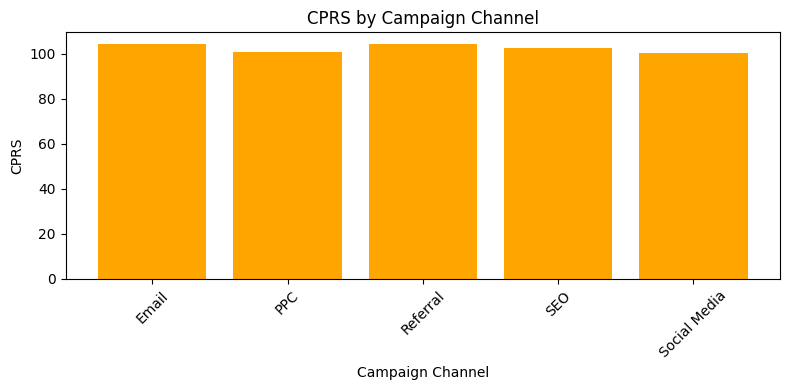

In [19]:
# CPRS = AdSpend / SocialShares

# CPRS Per Social Shares
cprs_df = data.groupby(['CampaignChannel','CampaignType'], as_index=False).agg({
    'AdSpend':'sum',
    'SocialShares':'sum'
})

cprs_df['CPRS'] = cprs_df.apply(lambda r: r['AdSpend'] / r['SocialShares'] if r['SocialShares'] > 0 else None, axis=1)

display(cprs_df.sort_values(by='CPRS'))

# Visualization
plt.figure(figsize=(8,4))
plt.bar(cprs_df['CampaignChannel'], cprs_df['CPRS'], color='orange')
plt.title('CPRS by Campaign Channel')
plt.xlabel('Campaign Channel')
plt.ylabel('CPRS')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Customer Engagement Analysis

### Website Engagement
- **Metrics Analyzed:** `WebsiteVisits`, `PagesPerVisit`, `TimeOnSite`
- **Observations:**  
  - Website Visits are distributed mostly between 0–50 visits per user.  
  - Pages per Visit vary between 1–10 pages, with moderate variation across users.  
  - Time on Site ranges from 0.5–15 minutes, suggesting varied engagement duration.  

- **Visualization:**  
  - Histograms clearly show frequency distributions for each metric.
  
---

### Social Media Engagement
- **Metric:** `SocialShares`  
- **Observations:**  
  - Users share content moderately across campaigns.  
  - Distribution is fairly uniform, indicating consistent engagement across the audience.  

- **Visualization:**  
  - Histogram illustrates the count of users by number of social shares.

---

### Email Engagement
- **Metrics:** `EmailOpens`, `EmailClicks`  
- **Observations:**  
  - Email Opens are distributed across 0–18 opens per user.  
  - Email Clicks vary between 0–9 clicks per user.  
  - Indicates that not all email opens translate to clicks, highlighting engagement gaps.

- **Visualization:**  
  - Side-by-side histograms for opens and clicks visualize engagement patterns.

---

### Correlation with Conversion and Loyalty Points
- **Metrics Correlated:** `WebsiteVisits`, `PagesPerVisit`, `TimeOnSite`, `SocialShares`, `EmailOpens`, `EmailClicks`, `Conversion`, `LoyaltyPoints`
- **Observations:**  
  - Conversion has weak-to-moderate positive correlation with `WebsiteVisits` (0.08), `PagesPerVisit` (0.10), `TimeOnSite` (0.13), and `EmailClicks` (0.13).  
  - Loyalty Points have minor correlation with engagement metrics (max ~0.13 with `EmailClicks` and `TimeOnSite`).  
  - SocialShares and EmailOpens show negligible correlation with Conversion and Loyalty Points.
  
- **Visualization:**  
  - Heatmap highlights correlations between engagement metrics, conversions, and loyalty points, identifying which interactions are more likely to impact campaign outcomes.

---

**Insights:**
- Website and email interactions show the most influence on conversions.  
- Social media shares are less directly linked to conversions or loyalty points.  
- Targeted strategies could focus on improving clicks from emails and increasing time spent on site to drive conversions.  


#### Distribution of website engagement metrics

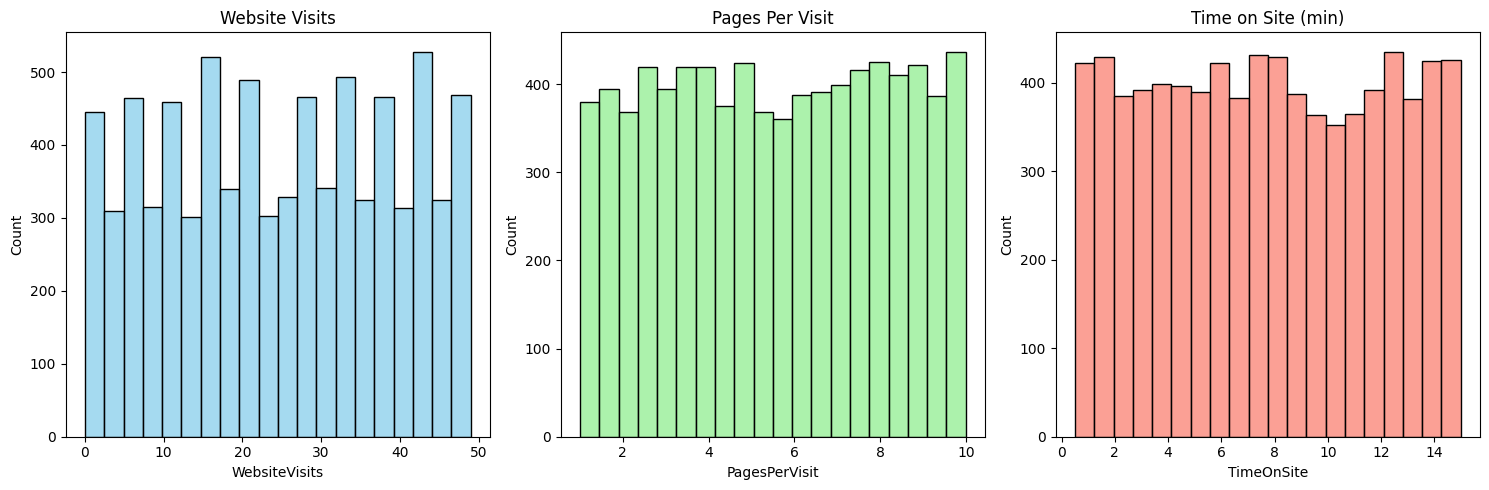

In [20]:
# Website metrics distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df["WebsiteVisits"], bins=20, ax=axes[0], color="skyblue")
axes[0].set_title("Website Visits")

sns.histplot(df["PagesPerVisit"], bins=20, ax=axes[1], color="lightgreen")
axes[1].set_title("Pages Per Visit")

sns.histplot(df["TimeOnSite"], bins=20, ax=axes[2], color="salmon")
axes[2].set_title("Time on Site (min)")

plt.tight_layout()
plt.show()


#### Social Media Engagement

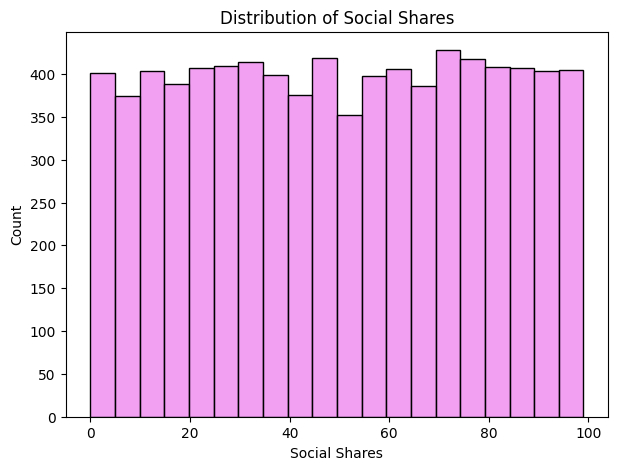

In [21]:
plt.figure(figsize=(7, 5))
sns.histplot(df["SocialShares"], bins=20, color="violet")
plt.title("Distribution of Social Shares")
plt.xlabel("Social Shares")
plt.ylabel("Count")
plt.show()

#### Email Engagement
- How many people actually clicked after opening
- How frequently each open (count occurs)

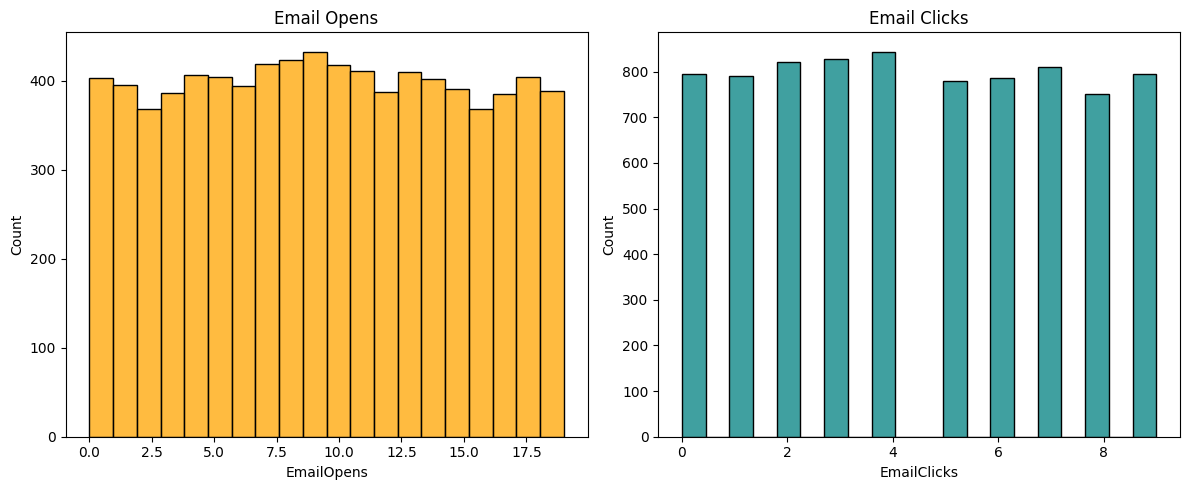

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df["EmailOpens"], bins=20, ax=axes[0], color="orange")
axes[0].set_title("Email Opens")

sns.histplot(df["EmailClicks"], bins=20, ax=axes[1], color="teal")
axes[1].set_title("Email Clicks")

plt.tight_layout()
plt.show()


#### Correlation with Conversion and Loyalty Point

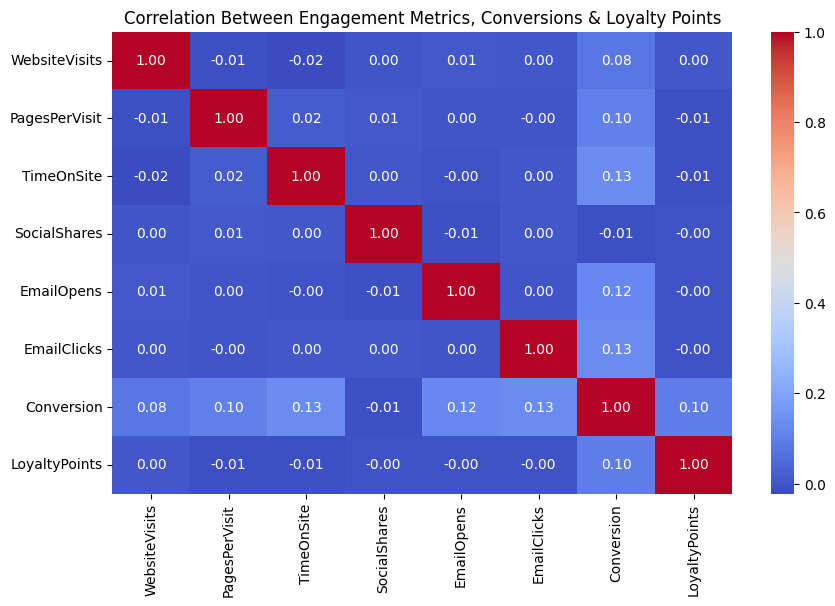

In [23]:
# Select relevant columns
engagement_cols = [
    "WebsiteVisits", "PagesPerVisit", "TimeOnSite",
    "SocialShares", "EmailOpens", "EmailClicks",
    "Conversion", "LoyaltyPoints"
]

# Correlation matrix
corr_matrix = df[engagement_cols].corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Engagement Metrics, Conversions & Loyalty Points")
plt.show()


### Channel Performance Comparison

We analyze the performance of different marketing channels in terms of **ClickThroughRate (CTR)**, **ConversionRate**, and **Ad Spend**.

#### 1. Average ClickThroughRate by Campaign Channel
The plot below shows the mean CTR for each campaign channel. CTR indicates how effectively a channel drives users to engage with the content.

| Campaign Channel | Average CTR |
|-----------------|------------|
| Email           | 0.156      |
| PPC             | 0.158      |
| Referral        | 0.152      |
| SEO             | 0.153      |
| Social Media    | 0.156      |

#### 2. Average ConversionRate by Campaign Channel
Conversion Rate reflects the proportion of visitors who complete a desired action (e.g., purchase or signup) for each channel.

| Campaign Channel | Average Conversion Rate |
|-----------------|------------------------|
| Email           | 0.105                  |
| PPC             | 0.104                  |
| Referral        | 0.103                  |
| SEO             | 0.104                  |
| Social Media    | 0.107                  |

#### 3. Total Ad Spend by Campaign Channel
The bar chart below displays the total advertising spend across channels. Higher spend does not always correlate with higher CTR or Conversion Rate.

| Campaign Channel | Total Ad Spend (in millions) |
|-----------------|-----------------------------|
| Email           | 7.87                        |
| PPC             | 8.20                        |
| Referral        | 8.65                        |
| SEO             | 7.74                        |
| Social Media    | 7.54                        |

**Insights:**  
- PPC and Referral channels have slightly higher CTR but also higher Ad Spend.  
- Social Media shows the highest Conversion Rate despite lower Ad Spend.  
- These metrics can guide optimization for future campaigns.


#### Aggregate ClickThroughRate (CTR) by CampaignChannel

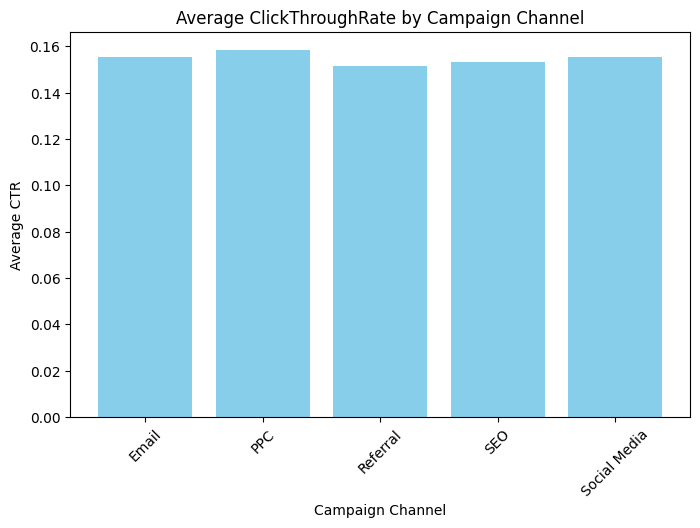

,CampaignChannel,ClickThroughRate
0,Email,0.155609
1,PPC,0.158307
2,Referral,0.151673
3,SEO,0.153150
4,Social Media,0.155523


In [24]:
# Aggregate CTR by channel
ctr_by_channel = df.groupby("CampaignChannel")["ClickThroughRate"].mean().reset_index()

# Visualization
plt.figure(figsize=(8,5))
plt.bar(ctr_by_channel["CampaignChannel"], ctr_by_channel["ClickThroughRate"], color='skyblue')
plt.title("Average ClickThroughRate by Campaign Channel")
plt.xlabel("Campaign Channel")
plt.ylabel("Average CTR")
plt.xticks(rotation=45)
plt.show()

ctr_by_channel

#### Aggregate ConversionRate by CampaignChannel

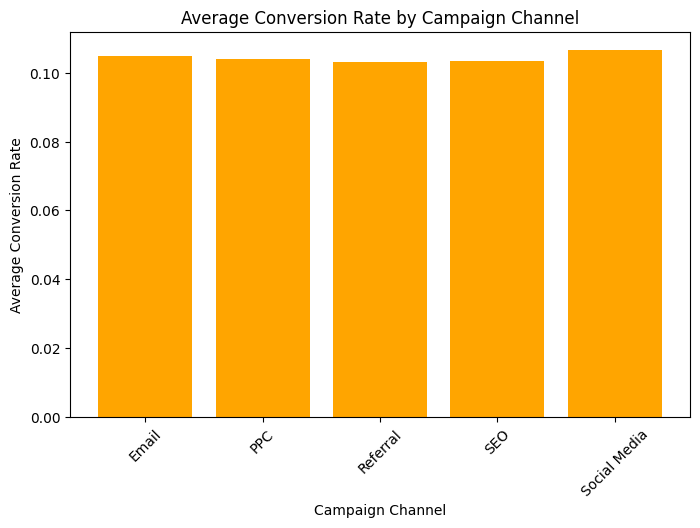

,CampaignChannel,ConversionRate
0,Email,0.104884
1,PPC,0.104132
2,Referral,0.103051
3,SEO,0.103530
4,Social Media,0.106550


In [25]:
# Aggregate Conversion Rate by channel
conv_by_channel = df.groupby("CampaignChannel")["ConversionRate"].mean().reset_index()

# Visualization
plt.figure(figsize=(8,5))
plt.bar(conv_by_channel["CampaignChannel"], conv_by_channel["ConversionRate"], color='orange')
plt.title("Average Conversion Rate by Campaign Channel")
plt.xlabel("Campaign Channel")
plt.ylabel("Average Conversion Rate")
plt.xticks(rotation=45)
plt.show()

conv_by_channel


#### Aggregate AdSpend by CampaignChannel

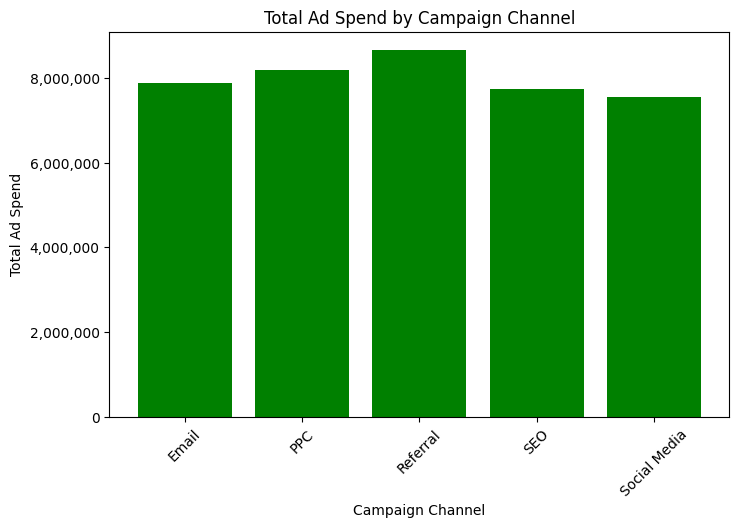

,CampaignChannel,AdSpend
0,Email,7.871576e+06
1,PPC,8.199237e+06
2,Referral,8.653519e+06
3,SEO,7.740904e+06
4,Social Media,7.542323e+06


In [26]:
# Aggregate Ad Spend by channel
spend_by_channel = df.groupby("CampaignChannel")["AdSpend"].sum().reset_index()

# Visualization
plt.figure(figsize=(8,5))
plt.bar(spend_by_channel["CampaignChannel"], spend_by_channel["AdSpend"], color='green')
plt.title("Total Ad Spend by Campaign Channel")
plt.xlabel("Campaign Channel")
plt.ylabel("Total Ad Spend")

# Format y-axis with commas
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.xticks(rotation=45)
plt.show()

spend_by_channel


In [27]:
data.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion,AgeGroup,IncomeGroup,SpendingPattern,SpendingPatternLabel,LoyaltyTier
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1,Senior Shopper,High Income Group,Medium-High_total_spend,Growing Value Customer,Silver
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1,Elderly Shopper,Low Income Group,Medium-Low_total_spend,Moderate Spender,Platinum
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1,Middle-Aged Shopper,Middle Income Group,Very High_total_spend,Premium Customer,Gold
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1,Adult Shopper,Low Income Group,Very Low_total_spend,No Purchase,Gold
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1,Senior Shopper,Middle Income Group,Very High_total_spend,Premium Customer,Platinum


In [28]:
data.to_csv(r"D:\Confiz\Project 4- Marketting Metrics\mall campaign\extracted_dataset\final_data.csv", index=False)